In [135]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

companies_csv = 'Bankrupt_companies.csv'

c_dataset = pd.read_csv(companies_csv)

In [136]:
c_dataset

,Company,Industry,Bankruptcy Date,Assets ($)
0,Hertz,"Travel, Lodging and Leisure",22-May,25.8B
1,Latam Airlines,"Travel, Lodging and Leisure",25-May,21.1B
2,Frontier Communications,"Telecoms, Media and Technology",14-Apr,17.4B
3,Chesapeake Energy,Energy,28-Jun,16.2B
4,Ascena Retail,Retail and Restaurants,23-Jul,13.7B
...,...,...,...,...
342,Northern Bear,Retail and Restaurants,8-Jun,50.0K
343,Specialty’s Cafe & Bakery,Retail and Restaurants,27-May,50.0K
344,CRT Food & Beverage,Retail and Restaurants,28-Apr,50.0K
345,Joffe Emergency Services,Other,12-Mar,50.0K


Industry
Retail and Restaurants                         123
Travel, Lodging and Leisure                     54
Energy                                          54
Other                                           42
Industrials, Materials, Equipment and Parts     26
Health and Personal Care                        26
Entertainment                                   16
Telecoms, Media and Technology                   6
Name: Company, dtype: int64

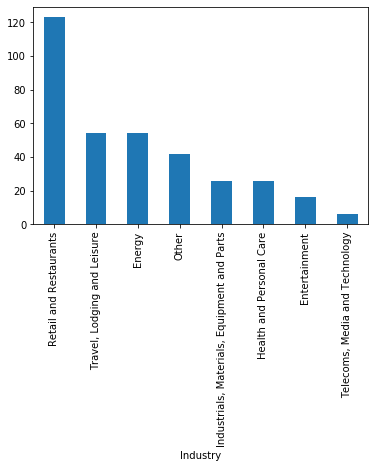

In [137]:
# Grouping data by industry to display most affected industry counting companies
g_data = c_dataset.groupby('Industry')
count_ind = g_data['Company'].count().sort_values(ascending = False)
display(count_ind)

# Plotting outcome of the industries
count_ind.plot(kind="bar")

# Proposed: Plot Assets by industry

In [138]:
# Time series of industries that bankrupted
year_date = []

for date in c_dataset['Bankruptcy Date']:
    #print(date)
    new_date = date.split('-')
    new_date.append('2020')
    final = "-".join(new_date)
    year_date.append(final)


# Setting data as date to sort  
c_dataset['Bankruptcy Date'] = year_date
c_dataset['Bankruptcy Date'] = pd.to_datetime(c_dataset['Bankruptcy Date'])
data_sorted = c_dataset.sort_values(by='Bankruptcy Date')

# Extracting month from the date

new_month = []
for month in data_sorted['Bankruptcy Date']:
    new_month.append(month.month)

# Adding month as a new column

data_sorted['Month'] = new_month
display(data_sorted)



,Company,Industry,Bankruptcy Date,Assets ($),Month
49,Foresight Energy,Energy,2020-03-10,1.0B,3
345,Joffe Emergency Services,Other,2020-03-12,50.0K,3
263,Miami Air International,"Travel, Lodging and Leisure",2020-03-24,1.0M,3
181,Alaska Urological Institute,Health and Personal Care,2020-03-25,10.0M,3
284,Woods Sealing & Striping,"Industrials, Materials, Equipment and Parts",2020-03-26,0.5M,3
...,...,...,...,...,...
316,Black Sea Fish and Grill,Retail and Restaurants,2020-12-16,50.0K,12
113,Tillary Hotel,"Travel, Lodging and Leisure",2020-12-18,50.0M,12
112,Renovate America,Other,2020-12-21,50.0M,12
136,Punch Bowl Social,Retail and Restaurants,2020-12-21,10.0M,12


Month
3      8
4     30
5     36
6     42
7     58
8     43
9     48
10    47
11    17
12    18
Name: Company, dtype: int64

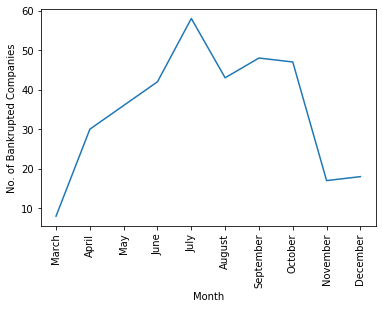

In [144]:

month_data = data_sorted.groupby('Month')
company_month = month_data['Company'].count()
display(company_month)

x_labels = 'March April May June July August September October November December'.split(" ")
plt.plot(x_labels,company_month)
plt.xticks(x_labels, rotation='vertical')
plt.xlabel('Month')
plt.ylabel('No. of Bankrupted Companies')
plt.show()
